<h1>Explorando base de dados de E-commerce</h1>
Estou usando uma base de dados do kaggle chamada "Brazil Clothing E-commerce Dataset".

O intuito desse projeto é entender a base de dados e pensar em soluções para problemas possiveis usando o dataset.

Como não existe um "problema" explicito ou uma pergunta para eu me basear , vou tentar dar ideias do que poderia ser feito com a base de dados.

In [1]:
#carregando as bibliotecas.
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Carregando a base de dados.
df = pd.read_csv('Dados_ecommerce.csv')
df.head(3)
df.drop(columns = df.columns[0],inplace = True)

In [3]:
#Começando a entender o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Título                2207 non-null   object 
 1   Preco_original        2207 non-null   float64
 2   Desconto_percentual   2207 non-null   float64
 3   Preco_com_desconto    2207 non-null   float64
 4   n_vendidos_categoria  2207 non-null   int64  
 5   Marca                 2184 non-null   object 
 6   Material              1332 non-null   object 
 7   Gênero                2120 non-null   object 
 8   Temporada             1135 non-null   object 
 9   Nota                  1559 non-null   float64
 10  N_Avaliações          2207 non-null   int64  
 11  Review1               1515 non-null   object 
 12  Review2               1354 non-null   object 
 13  Review3               1233 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 241.5+ KB


In [4]:
df.head(6)#Vendo como está funcionando atributo nas colunas 

,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Temporada,Nota,N_Avaliações,Review1,Review2,Review3
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,69.90,0.00,69.90,1000,TORONTO UNIFORMES PROFISSIONAIS,Poliéster,Sem gênero,NaN,4.0,273,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...","Muito bom, só poderia ter os cortes na lateral..."
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,274.81,0.18,232.89,10000,Lupo,Algodão,Masculino,Outono/Inverno,4.5,3034,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...","Serviram muito bem, porém é nítido que o pano ..."
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,239.88,0.20,199.90,50000,Zorba,Algodão,Masculino,NaN,4.7,5682,O tecido é bom e são confortáveis. Só que a nu...,Vendo comentários de outros consumidores vejo ...,"Produto não é nem de longe original, tecido gr..."
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,279.86,0.22,229.39,10000,Mash,Algodão,Masculino,Primavera/Verão,4.6,1700,"As cuecas são boas, porém meu marido usa g e p...","E o tamanho certo, mas em baixo dela, fica mui...",Produto não parece.\nOriginal e veio 2 modelos...
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,140.83,0.09,129.20,1000,Menina Linda,Jean,Feminino,Primavera/Verão,4.4,507,Estou encantada com essas peças!.\nOs shorts s...,"Recomendo, tecido confortável, igual a foto.","Gostei muito dos shorts, material bom, para us..."
5,Blusa + Calça Térmica Treino Futebol Criança I...,82.22,0.05,78.30,100,Roupa Zero grau,TERMICO UNISSEX,Sem gênero infantil,Outono/Inverno,4.7,58,"Produto ótimo , mesmo após várias lavagens não...",Produto de boa qualidade.\nNão gruda pêlos e n...,Super quentinho. Só achei a gola muito aberta.


In [5]:
df.isnull().sum() #Vendo os dados faltantes e tentar entender como que cada um está funcionando 

Título                     0
Preco_original             0
Desconto_percentual        0
Preco_com_desconto         0
n_vendidos_categoria       0
Marca                     23
Material                 875
Gênero                    87
Temporada               1072
Nota                     648
N_Avaliações               0
Review1                  692
Review2                  853
Review3                  974
dtype: int64

In [6]:
#Dando uma olhada na coluna gênero, pois costuma ter variaveis iguais com nomes diferentes, exemplo: "masculino", "M", "Feminino", "F".
df['Gênero'].value_counts()

Feminino                             723
Masculino                            545
Bebês                                311
Sem gênero                           248
Meninas                              119
Meninos                              108
Sem gênero infantil                   54
Mulher                                 4
short menina verao look mulher         3
roupa para gordinha pluss P ao 52      2
Unissex                                1
menino                                 1
bermuda feminina brilho Blogueira      1
Name: Gênero, dtype: int64

<h1>Problemas encontrados dentro do dataset</h1>

Existe uma necessidade em tratar esses dados. A coluna temporada tem mais de 50% dos dados faltando e a coluna gênero tem muitos dados repetidos.

As medidas que eu tomarei são: 

1- Remover a coluna "Temporada",talvez ela seja importante, mas com tantos dados faltantes não vejo como utiliza-la.

2- As colunas de Reviews também tem muitos dados faltantes então eu tirarei.

3- Formatar a coluna gênero para "Masculino", "Feminino", "Sêm gênero". Dentro dessa coluna existe também a opção "Bebês", apesar de não ser um gênero, prefiro mantê-la nessa coluna já que ela pode dizer qual material está sendo utilizado.

4- Eu utilizarei os materiais para fazer a relação de quantidade de vendas(Mesmo que a coluna tenha  muitos valores faltando).

5- As notas eu não tirarei, pois é uma métrica importante dentro de um e-commerce. Para lidar com esses valores faltantes eu os substituirei pela média ou pela mediana.


In [7]:
#Dropando colunas  de review e temporada.
df_limpo  = df.drop(columns = ['Temporada','Review1','Review2','Review3'])
df_limpo

,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Nota,N_Avaliações
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,69.90,0.00,69.90,1000,TORONTO UNIFORMES PROFISSIONAIS,Poliéster,Sem gênero,4.0,273
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,274.81,0.18,232.89,10000,Lupo,Algodão,Masculino,4.5,3034
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,239.88,0.20,199.90,50000,Zorba,Algodão,Masculino,4.7,5682
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,279.86,0.22,229.39,10000,Mash,Algodão,Masculino,4.6,1700
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,140.83,0.09,129.20,1000,Menina Linda,Jean,Feminino,4.4,507
...,...,...,...,...,...,...,...,...,...,...
2202,Bermuda Masculina Tática Thunder Poly Ripstop ...,131.78,0.10,119.80,5,Use Tático,Poliéster,Masculino,4.3,3
2203,Camiseta Preta Juvenil Infantil Menina Menino ...,23.16,0.13,20.50,25,DestaQ,Algodão,Sem gênero infantil,NaN,0
2204,Blusa Personalizada Jaqueta Com Sua Marca Logo...,93.99,0.00,93.99,1,Inoffensive,NaN,Feminino,NaN,0
2205,Roupa Infantil Social Menino - Bebê Batizado F...,97.30,0.00,97.30,50,Balão Magico Kids,NaN,Bebês,4.7,14


In [8]:
#Substituindo valores  do genero 
df_limpo['Gênero'].replace({'Meninos':'Masculino',
                          'Meninas':'Feminino',
                          'Sem gênero infantil':'Sem gênero',
                          'Mulher':'Feminino',
                           'short menina verao look mulher':'Feminino',
                           'roupa para gordinha pluss P ao 52' :'Feminino',
                           'Unissex':'Sem gênero',
                           'menino':'Masculino',
                           'bermuda feminina brilho Blogueira':'Feminino'},inplace = True)
df_limpo['Gênero'].value_counts()

Feminino      852
Masculino     654
Bebês         311
Sem gênero    303
Name: Gênero, dtype: int64

In [9]:
#Verificando valores estatísticos para a coluna notas. 
df['Nota'].describe()

count    1559.000000
mean        4.560936
std         0.362854
min         2.300000
25%         4.400000
50%         4.600000
75%         4.800000
max         5.000000
Name: Nota, dtype: float64

In [10]:
#Vendo a  mediana para comparar com o valor da minha  média.
df['Nota'].median()

4.6

In [11]:
#Já que minha média não esta sendo puxada pra cima(mediana está em 4.6 e a media em 4.5), eu escolhi usar a média para substituir os valores que estão faltando.
df['Nota'].fillna(df['Nota'].mean(),inplace =  True)
df['Nota'].isna().sum()

0

<h4>Agora vem a pergunta importante, qual o problema eu quero resolver com esses dados ?</h4>


Existem 2 colunas dentro dos meus dados que na minha opinião podem trazer bons insights:

-N_vendidos_categoria (Quantidade de vendas daquele produto).<br>
-Notas(Avaliação do produto).

In [12]:
#Vou agrupar minhas colunas categóricas e vou relaciona-las com o numero de vendas 
colunas_string = df_limpo.select_dtypes(include = 'object')

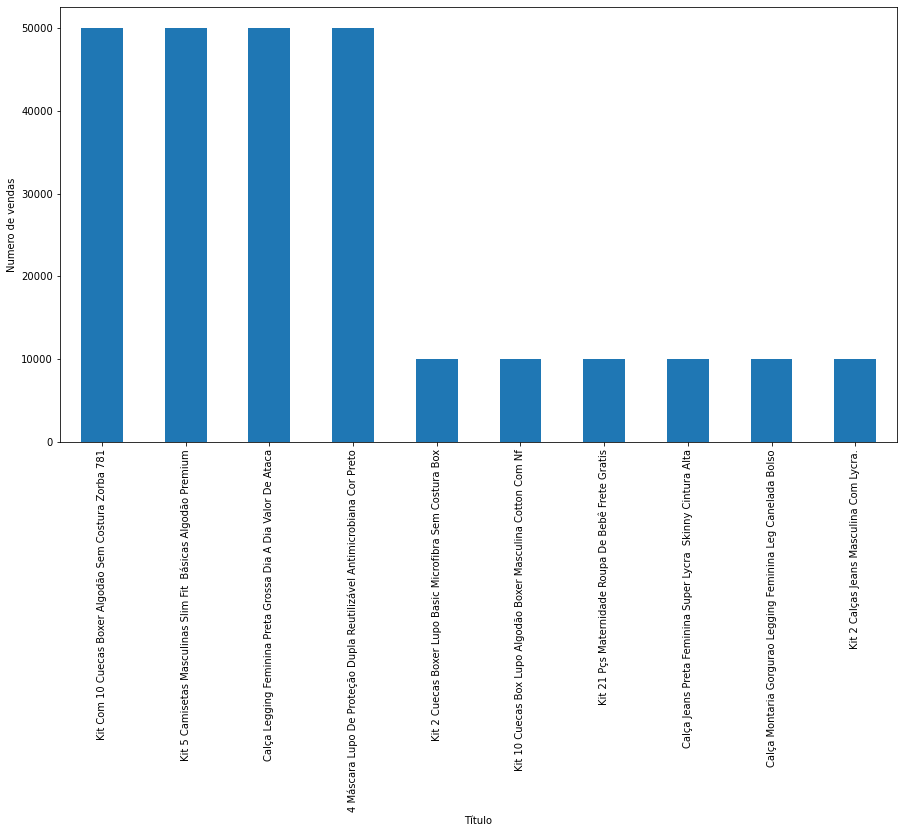

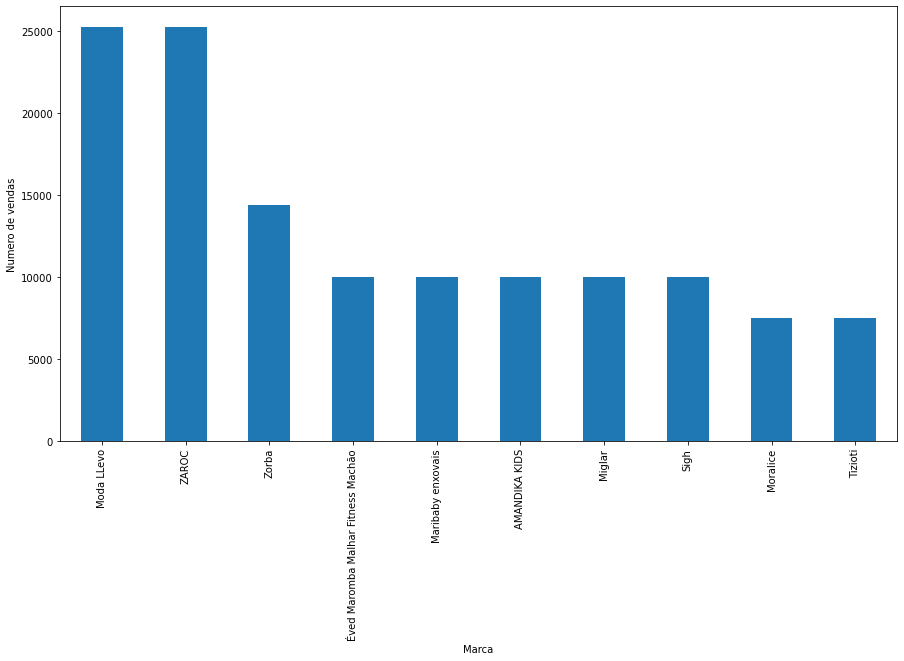

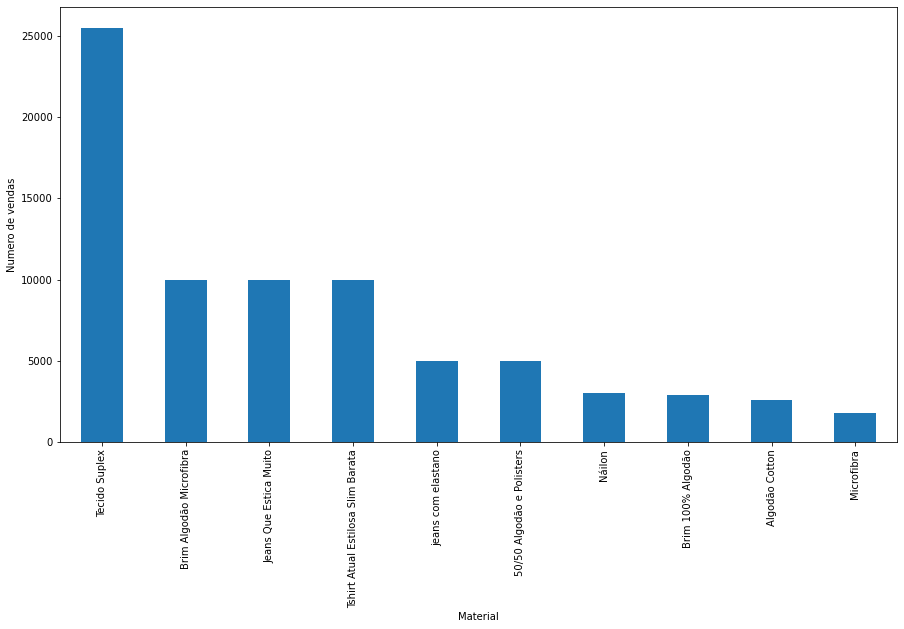

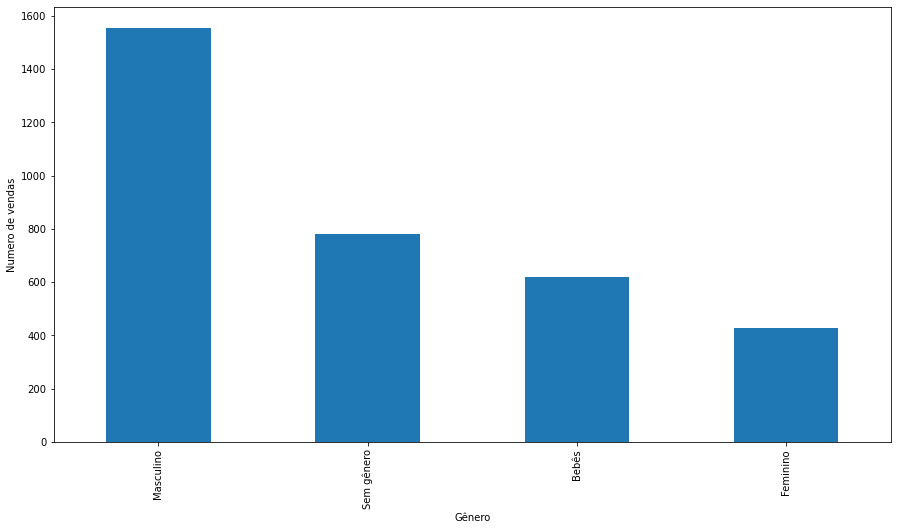

In [18]:
for coluna in colunas_string.columns:
    plt.figure(figsize = (15,8))
    df_limpo.groupby(coluna)['n_vendidos_categoria'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
    plt.ylabel('Numero de vendas')
    plt.show()

Esses gráficos me mostram que:

1- Os produtos mais vendidos (coloquei apenas os 10 primeiros).

2- Moda Llevo e Zaroc são as marcas mais vendidas.

3- As pessoas compram bem mais tecido suplex do que os outros materiais.

4- O gênero que mais vende é o masculino.

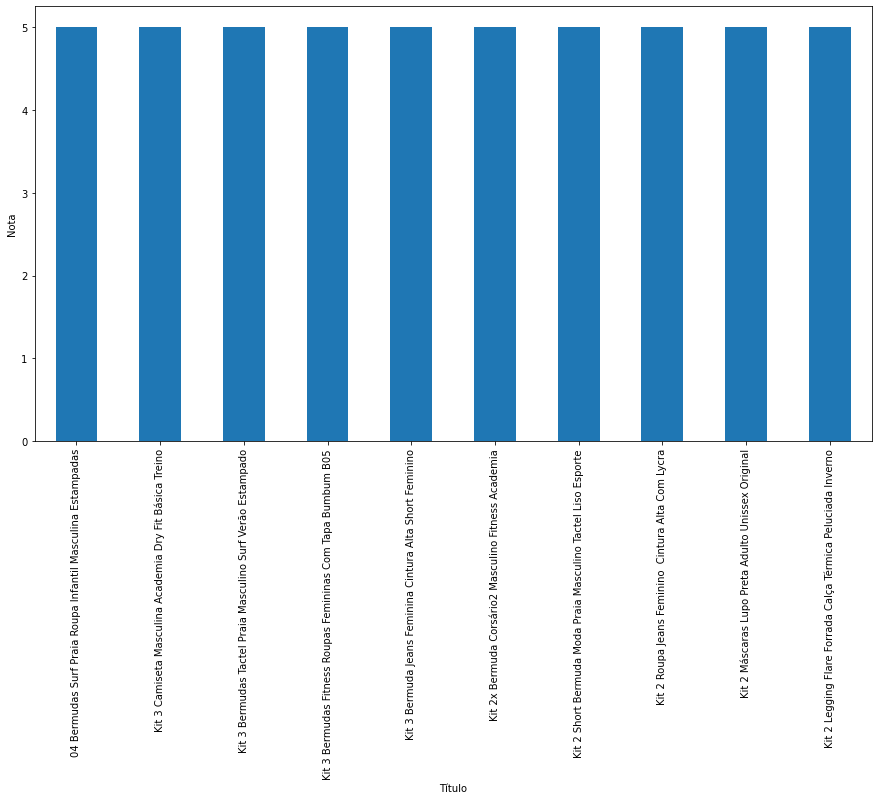

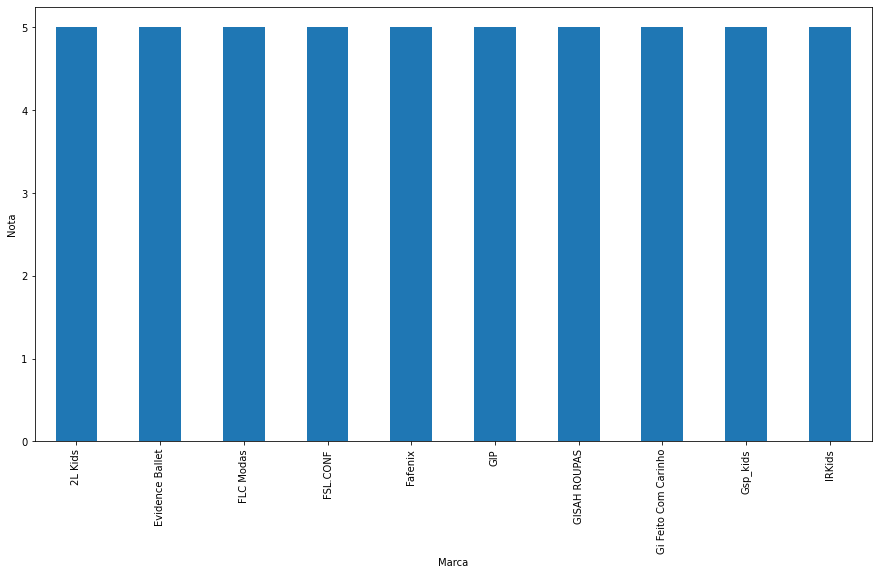

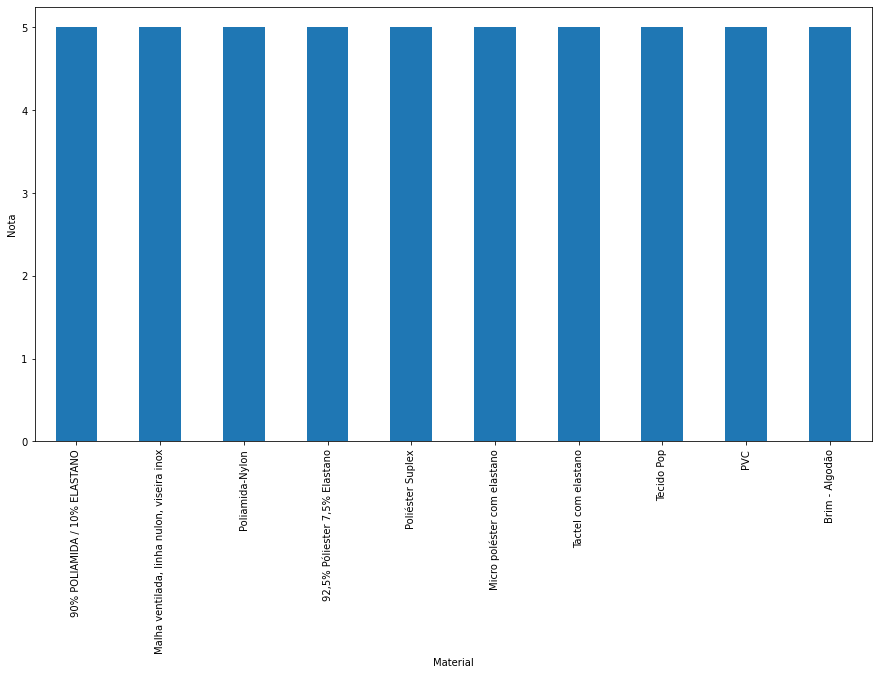

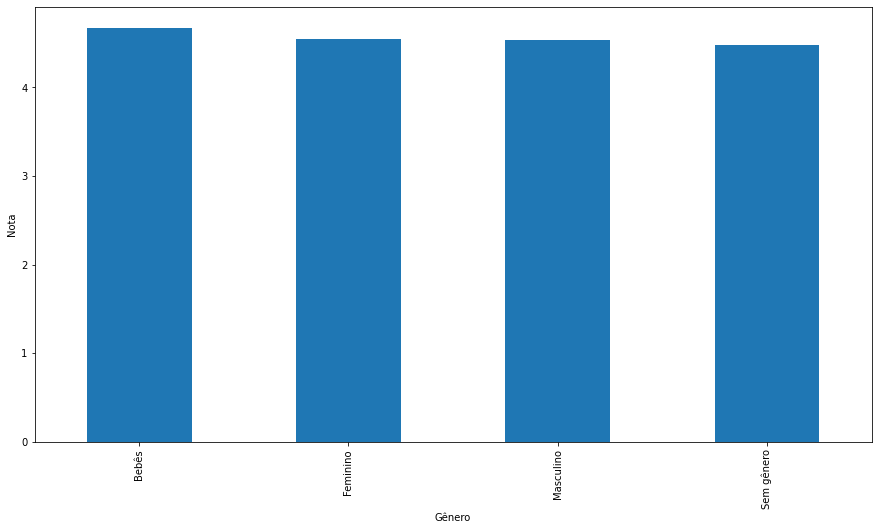

In [14]:
#Farei o mesmo agora utilizando as notas 
for coluna in colunas_string.columns:
    plt.figure(figsize = (15,8))
    df_limpo.groupby(coluna)['Nota'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
    plt.ylabel('Nota')
    plt.show()

Nos gráficos que se relacionam com acoluna "nota" todas as 10 primeiras variáveis tem médias perto de 5, então não consegui tirar uma conclusão precisa.

In [15]:
#pegando  minhas colunas numéricas  e  fazendo a  relação  também
colunas_numéricas  =  df_limpo.select_dtypes(['float64','int64'])

#Checando as correlações dentro do meu número de vendas
colunas_numéricas.corr()['n_vendidos_categoria']

Preco_original          0.091779
Desconto_percentual     0.176462
Preco_com_desconto      0.058330
n_vendidos_categoria    1.000000
Nota                   -0.006356
N_Avaliações            0.854573
Name: n_vendidos_categoria, dtype: float64

In [16]:
colunas_numéricas.corr()['Nota']
#Dentro da minha nota não consegui achar correlações muito fortes

Preco_original         -0.002836
Desconto_percentual     0.007566
Preco_com_desconto     -0.000894
n_vendidos_categoria   -0.006356
Nota                    1.000000
N_Avaliações           -0.015285
Name: Nota, dtype: float64

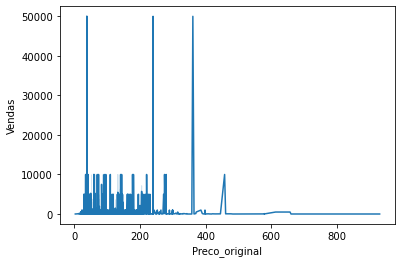

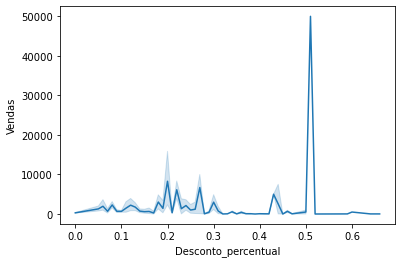

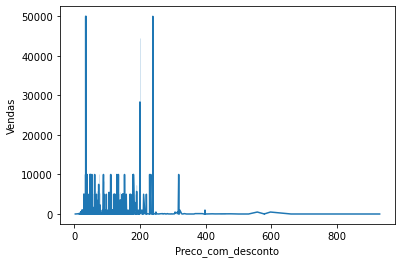

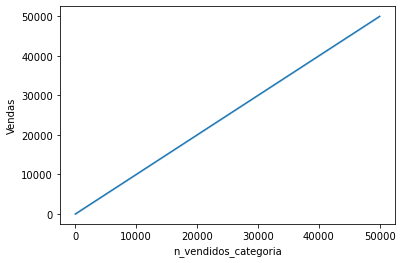

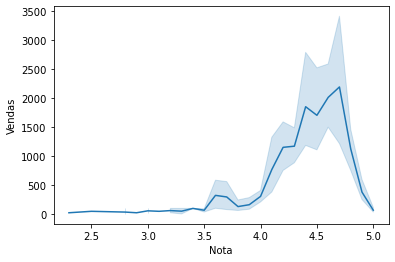

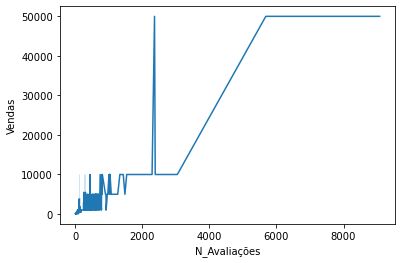

In [17]:
#Demonstrando como as variáveis numéricas impactaram no número de vendas e em qual região 
for colunas in colunas_numéricas.columns:
    sns.lineplot(x=colunas_numéricas[colunas],y = colunas_numéricas['n_vendidos_categoria'])
    plt.xlabel(colunas)
    plt.ylabel('Vendas')
    plt.show()

<h1>Conclusão</h1>

Com essa análise consegui descobrir algumas coisas: 

1- Produtos que mais venderam.  
2- Qual gênero mais comprou.  
3- Marcas que mais venderam.  
4- Produtos com as maiores notas.  


Com esse dataset é possivel ver a relação dos meus produtos com os seus numeros de vendas e o que impacta melhor as vendas dos meus produtos. 
No caso da nota não consegui ver com tanta clareza o que impactou notas altas ou baixas(talvez por eu ter tirado a coluna reviews).

<h3>Como aplicar esses dados</h3>

1- Identificar o público que mais vendo e buscar chamar mais atenção deles.

2- Focar em produtos que  me trazem mais vendas  

3- Pla